# K-NN (Nearest Neighbour)  

## First we need to import packages that we are going to use 

Import packages for analysis of data 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import packages to conduct machine learning 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


## Load Dataset that is to be used as an example

url of dataset that is to be used 

In [114]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Assign column names and also load dataset using pandas 

In [115]:
# assign column names

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#read dataset to pd
dataset = pd.read_csv(url, names = names)

### Inspect the data

In [116]:
 ## Inspect dataset 

dataset.head()

len(list(dataset)) # number of columns in dataset


5

Sort the data according to the type of flower 

In [117]:
setosa = dataset[dataset['Class'] == 'Iris-setosa']
versicolor=dataset[dataset['Class'] == 'Iris-versicolor']
virginica=dataset[dataset['Class'] == 'Iris-virginica']


## Visualizing the data 

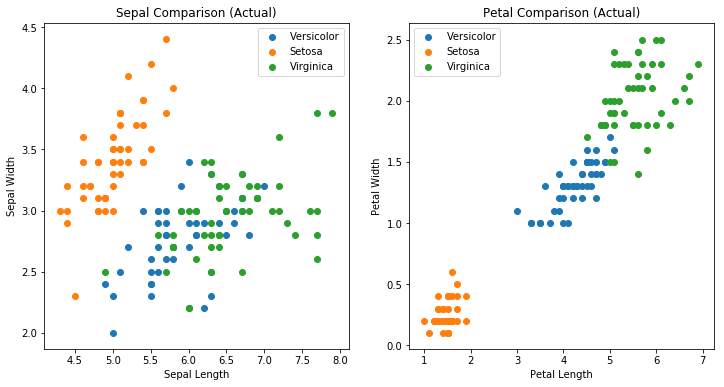

In [118]:

#Actual sepal length and width
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(versicolor['sepal-length'], versicolor['sepal-width'])
plt.scatter(setosa['sepal-length'], setosa['sepal-width'])
plt.scatter(virginica['sepal-length'], virginica['sepal-width'])
plt.title("Sepal Comparison (Actual)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(('Versicolor', 'Setosa', 'Virginica'))

#Actual Petal length and width
plt.subplot(1,2,2)
plt.scatter(versicolor['petal-length'], versicolor['petal-width'])
plt.scatter(setosa['petal-length'], setosa['petal-width'])
plt.scatter(virginica['petal-length'], virginica['petal-width'])
plt.title("Petal Comparison (Actual)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(('Versicolor', 'Setosa', 'Virginica'))
plt.show()

 Visualizing dataset with only 2 classes

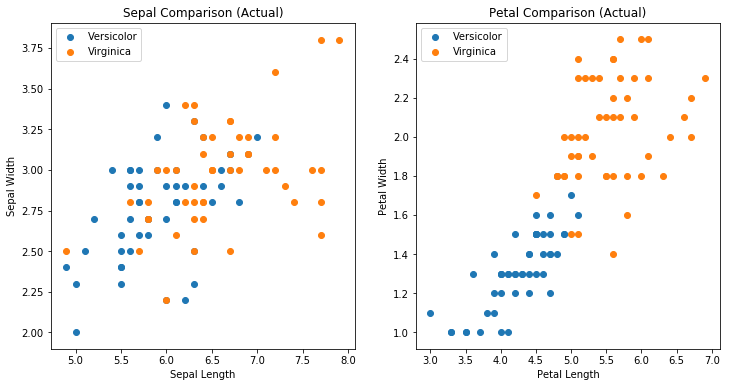

In [119]:

#Actual sepal length and width
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(versicolor['sepal-length'], versicolor['sepal-width'])
plt.scatter(virginica['sepal-length'], virginica['sepal-width'])
plt.title("Sepal Comparison (Actual)")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(('Versicolor', 'Virginica'))

#Actual Petal length and width
plt.subplot(1,2,2)
plt.scatter(versicolor['petal-length'], versicolor['petal-width'])
plt.scatter(virginica['petal-length'], virginica['petal-width'])
plt.title("Petal Comparison (Actual)")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend(('Versicolor', 'Virginica'))
plt.show()

Trimming the dataset 

this is done to allow easier understanding of the algorithm 

In [120]:
trim = pd.concat([virginica, versicolor])
trim.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [121]:
len(trim)

100

Combining the dataset 
- we make the dataset smaller to easier analyze the data

In [122]:
X = trim.iloc[:,2:-1].values

From this we want to only want the petal data 

In [123]:
y = trim.iloc[:,4].values

### obtain values as input in machine learning algorithm

 Input values 

Output values 

 Assign values to variables 

## Machine Learning 

 Split dataset into test and train dataset 

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

Inspecting train dataset 

In [125]:
X_train

array([[4.2, 1.3],
       [5. , 1.9],
       [4.4, 1.4],
       [4.7, 1.4],
       [6. , 1.8],
       [4. , 1.3],
       [5.3, 2.3],
       [4.5, 1.7],
       [4.9, 1.5],
       [5.1, 1.9],
       [4.9, 1.5],
       [4.9, 1.8],
       [3.8, 1.1],
       [4.5, 1.5],
       [4.2, 1.5],
       [3. , 1.1],
       [4.5, 1.5],
       [4.8, 1.8],
       [4. , 1. ],
       [4.5, 1.5],
       [4.4, 1.2],
       [5.6, 1.4],
       [4.7, 1.6],
       [5.1, 1.9],
       [5.9, 2.1],
       [3.5, 1. ],
       [6.7, 2. ],
       [4.7, 1.4],
       [3.7, 1. ],
       [4.8, 1.4],
       [5. , 1.5],
       [4. , 1.2],
       [6.4, 2. ],
       [4.2, 1.2],
       [4.3, 1.3],
       [5.2, 2. ],
       [4.6, 1.5],
       [4.2, 1.3],
       [4.1, 1.3],
       [5.1, 2.4],
       [6.6, 2.1],
       [5.8, 1.8],
       [5.6, 2.1],
       [6.1, 1.9],
       [6. , 2.5],
       [5.1, 1.5],
       [5.6, 2.2],
       [3.5, 1. ],
       [5.9, 2.3],
       [5.5, 1.8],
       [5.6, 2.4],
       [3.9, 1.4],
       [6.9,

In [126]:
X_train[:,0]

array([4.2, 5. , 4.4, 4.7, 6. , 4. , 5.3, 4.5, 4.9, 5.1, 4.9, 4.9, 3.8,
       4.5, 4.2, 3. , 4.5, 4.8, 4. , 4.5, 4.4, 5.6, 4.7, 5.1, 5.9, 3.5,
       6.7, 4.7, 3.7, 4.8, 5. , 4. , 6.4, 4.2, 4.3, 5.2, 4.6, 4.2, 4.1,
       5.1, 6.6, 5.8, 5.6, 6.1, 6. , 5.1, 5.6, 3.5, 5.9, 5.5, 5.6, 3.9,
       6.9, 5. , 5.8, 5.1, 5.5, 4.6, 5. , 5.7, 4.1, 4.5, 5.1, 5.4, 4.6,
       5.4, 3.9, 4.4, 5.1, 4.4])

In [127]:
df_train = pd.DataFrame({'data1': X_train[:,0], 'data2': X_train[:,-1], 'class': y_train})

In [128]:
df_train

,data1,data2,class
0,4.2,1.3,Iris-versicolor
1,5.0,1.9,Iris-virginica
2,4.4,1.4,Iris-versicolor
3,4.7,1.4,Iris-versicolor
4,6.0,1.8,Iris-virginica
5,4.0,1.3,Iris-versicolor
6,5.3,2.3,Iris-virginica
7,4.5,1.7,Iris-virginica
8,4.9,1.5,Iris-versicolor
9,5.1,1.9,Iris-virginica


In [129]:
len(df_train)

70

In [130]:
versicolor_train = df_train[df_train['class'] == 'Iris-versicolor']
virginica_train = df_train[df_train['class'] == 'Iris-virginica']

In [131]:
X_train[:,1]

array([1.3, 1.9, 1.4, 1.4, 1.8, 1.3, 2.3, 1.7, 1.5, 1.9, 1.5, 1.8, 1.1,
       1.5, 1.5, 1.1, 1.5, 1.8, 1. , 1.5, 1.2, 1.4, 1.6, 1.9, 2.1, 1. ,
       2. , 1.4, 1. , 1.4, 1.5, 1.2, 2. , 1.2, 1.3, 2. , 1.5, 1.3, 1.3,
       2.4, 2.1, 1.8, 2.1, 1.9, 2.5, 1.5, 2.2, 1. , 2.3, 1.8, 2.4, 1.4,
       2.3, 1.7, 2.2, 1.6, 1.8, 1.4, 2. , 2.3, 1. , 1.5, 2. , 2.1, 1.3,
       2.3, 1.2, 1.3, 1.8, 1.4])

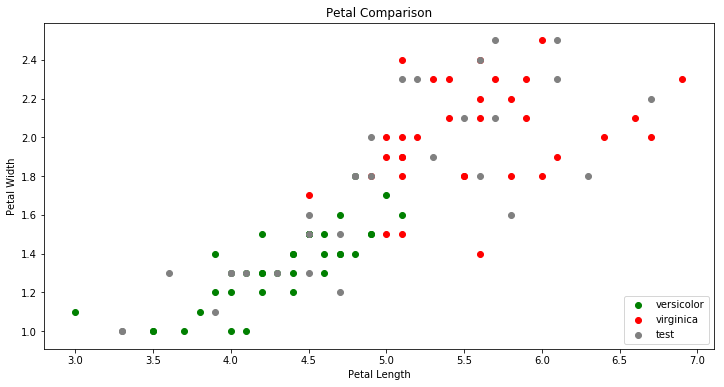

In [132]:
#plot train and test data together
plt.figure(figsize=(12,6))

plt.scatter(versicolor_train['data1'], versicolor_train['data2'], c='g', label = 'versicolor')
plt.scatter(virginica_train['data1'], virginica_train['data2'], c ='r', label = 'virginica')

plt.scatter(X_test[:,0],X_test[:,1], c= 'gray', label= 'test')

plt.legend(loc = 4)
plt.title('Petal Comparison')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

plt.show()

Transforming data into scalar format to allow easier machine learning

In [133]:
scalar = StandardScaler()
scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

Train the KNN Clasifier

In [134]:
#Train the KNN Clasifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Obtain prediction of the test casses 

In [135]:
#Obtain prediction of the test casses
pred = classifier.predict(X_test)

View the results & compare with original answer

In [136]:
pred

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [137]:
y_test

array(['Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [138]:
# Calculate accuracy of model

In [139]:
acc = accuracy_score(y_test, pred)
acc


1.0

In [140]:
#Calculation of errors for K values between 1 and 40

error = []

for i in range(1,40): 
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    

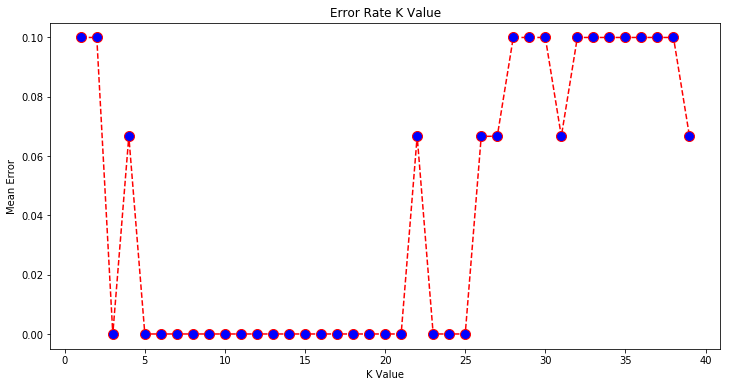

In [141]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color = 'red', linestyle ='dashed', marker = 'o',
         markerfacecolor = 'blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()